# Minimizing Churn through analysis of Financial habits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
churn_df = pd.read_csv('Churn_data.csv')
churn_df.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
churn_df.shape

(27000, 31)

In [5]:
churn_df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [6]:
churn_df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [7]:
churn_df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
null_percentage = churn_df.isnull().sum() / len(churn_df) * 100
null_percentage_formatted = null_percentage.apply(lambda x: f'{x:.2f}%')
print(null_percentage_formatted)

user                        0.00%
churn                       0.00%
age                         0.01%
housing                     0.00%
credit_score               29.74%
deposits                    0.00%
withdrawal                  0.00%
purchases_partners          0.00%
purchases                   0.00%
cc_taken                    0.00%
cc_recommended              0.00%
cc_disliked                 0.00%
cc_liked                    0.00%
cc_application_begin        0.00%
app_downloaded              0.00%
web_user                    0.00%
app_web_user                0.00%
ios_user                    0.00%
android_user                0.00%
registered_phones           0.00%
payment_type                0.00%
waiting_4_loan              0.00%
cancelled_loan              0.00%
received_loan               0.00%
rejected_loan               0.00%
zodiac_sign                 0.00%
left_for_two_month_plus     0.00%
left_for_one_month          0.00%
rewards_earned             11.95%
reward_rate   

In [9]:
churn_df = churn_df[pd.notnull(churn_df['age'])]

In [10]:
churn_df = churn_df.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
churn_df2 = churn_df.drop(columns = ['user', 'churn'])

In [12]:
churn_df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [13]:
churn_df2.shape

(26996, 27)

In [14]:
# Identify binary and continuous variables
binary_cols = [col for col in churn_df.columns if churn_df[col].nunique() == 2]
continuous_cols = [col for col in churn_df.columns if churn_df[col].nunique() > 2]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

Binary columns: ['churn', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']
Continuous columns: ['user', 'age', 'housing', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'registered_phones', 'payment_type', 'zodiac_sign', 'reward_rate']


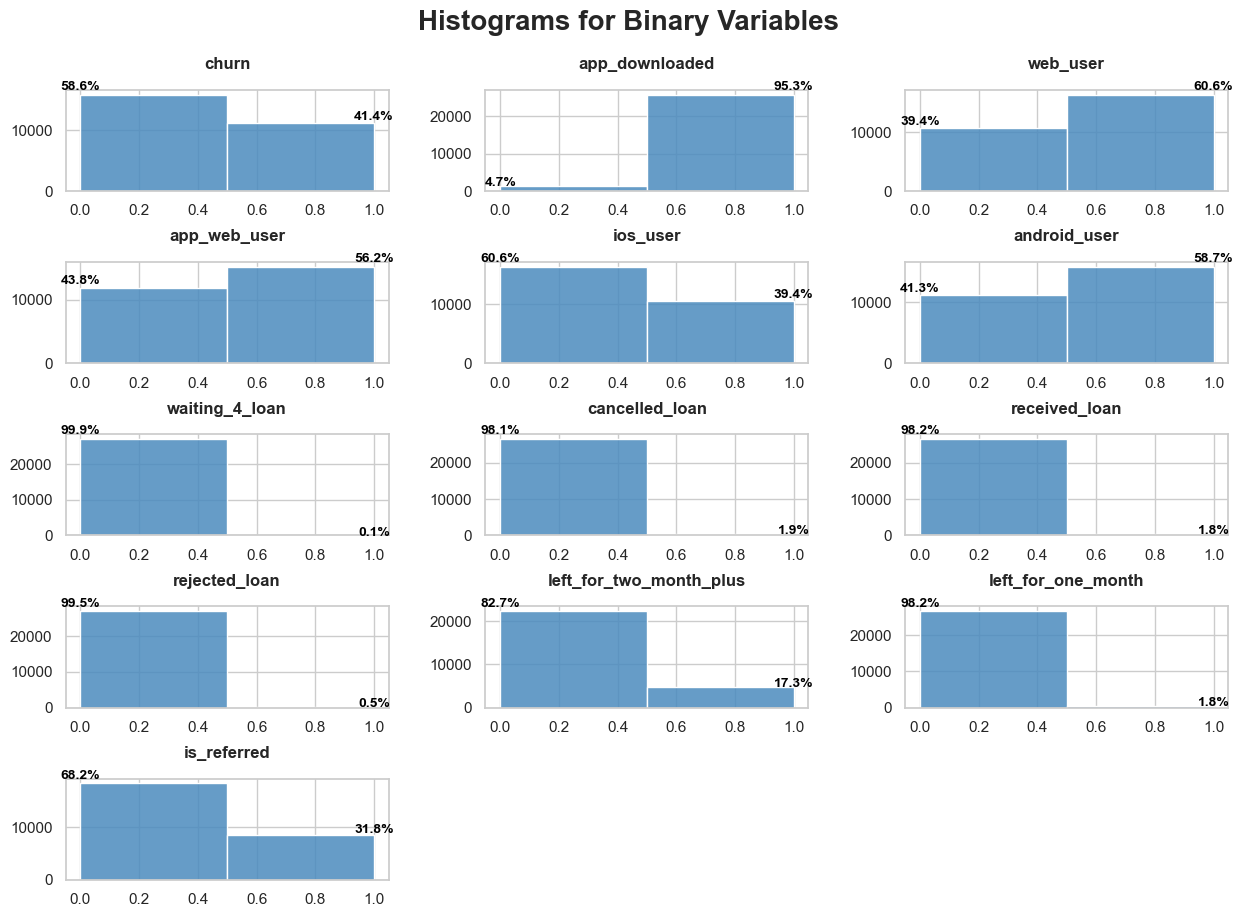

In [15]:
# Exploratory Data Analysis

# Set Seaborn styling for better aesthetics
sns.set(style="whitegrid")

# Number of binary variables and columns per row
num_plots = len(binary_cols)
cols_per_row = 3  # Reduce number of columns per row to avoid overlapping

# Determine the number of rows required based on the number of binary variables
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(15, 10))  
plt.suptitle('Histograms for Binary Variables', fontsize=20, fontweight='bold')

axes = axes.ravel()  # Flatten the 2D axes array to 1D for easy iteration

for i, col in enumerate(binary_cols):
    sns.histplot(churn_df[col], bins=2, kde=False, color='#4B8BBE', alpha=0.85, ax=axes[i])
    
    # Set title for each subplot, adjust padding to avoid overlap
    axes[i].set_title(col, fontsize=12, fontweight='bold', pad=15)  # Adjust pad for spacing
    
    # Remove x-axis labels
    axes[i].set_xlabel('')
    
    # Remove y-axis labels (Frequency)
    axes[i].set_ylabel('')
    
    # Add percentage labels on top of the bars
    counts = churn_df[col].value_counts()
    for j, v in enumerate(counts):
        axes[i].text(counts.index[j], v + 0.05 * v, f'{(v / counts.sum() * 100):.1f}%', 
                     color='black', ha='center', fontsize=10, fontweight='bold')

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout for better readability
plt.subplots_adjust(hspace=0.7, wspace=0.3, top=0.9)

# Display the plot
plt.show()


The histograms represent the distribution of certain binary variables (0 or 1 values) related to customer behavior or loan status. Here are some of the key observations from the charts:

1. **Churn**:
    - 58.6% of users have churned (value of 0), and 41.4% have not churned (value of 1).
2. **App Downloaded**:
    - A large majority, 95.3%, have downloaded the app (value of 1), while only 4.7% have not.
3. **Web User**:
    - 60.6% are web users (value of 1), and 39.4% are not.
4. **App Web User**:
    - 56.2% are both app and web users (value of 1), while 43.8% are not.
5. **iOS User**:
    - 39.4% are iOS users, while 60.6% are not (likely Android users or other platforms).
6. **Android User**:
    - 58.7% are Android users, and 41.3% are not (likely iOS users or others).
7. **Waiting for Loan**:
    - Almost all users (99.9%) are still waiting for their loan (value of 0), while only 0.1% are not.
8. **Cancelled Loan**:
    - 98.1% of users have not canceled their loan (value of 0), while 1.9% have.
9. **Received Loan**:
    - 98.2% of users have not received a loan, and only 1.8% have.
10. **Rejected Loan**:
    - 99.5% of users have not had their loans rejected, while 0.5% have.
11. **Left for Two Months Plus**:
    - 82.7% of users have stayed, while 17.3% left for more than two months.
12. **Left for One Month**:
    - 98.2% of users have not left for one month, while 1.8% have.
13. **Is Referred**:
    - 68.2% of users are not referred (value of 0), while 31.8% are referred (value of 1).

These charts provide insights into user behavior, such as app usage, loan status, and platform preference. Most users have downloaded the app, are web users, and have not received or canceled their loans yet. There's also a significant difference in the platform usage between iOS and Android, with more users leaning towards Android.

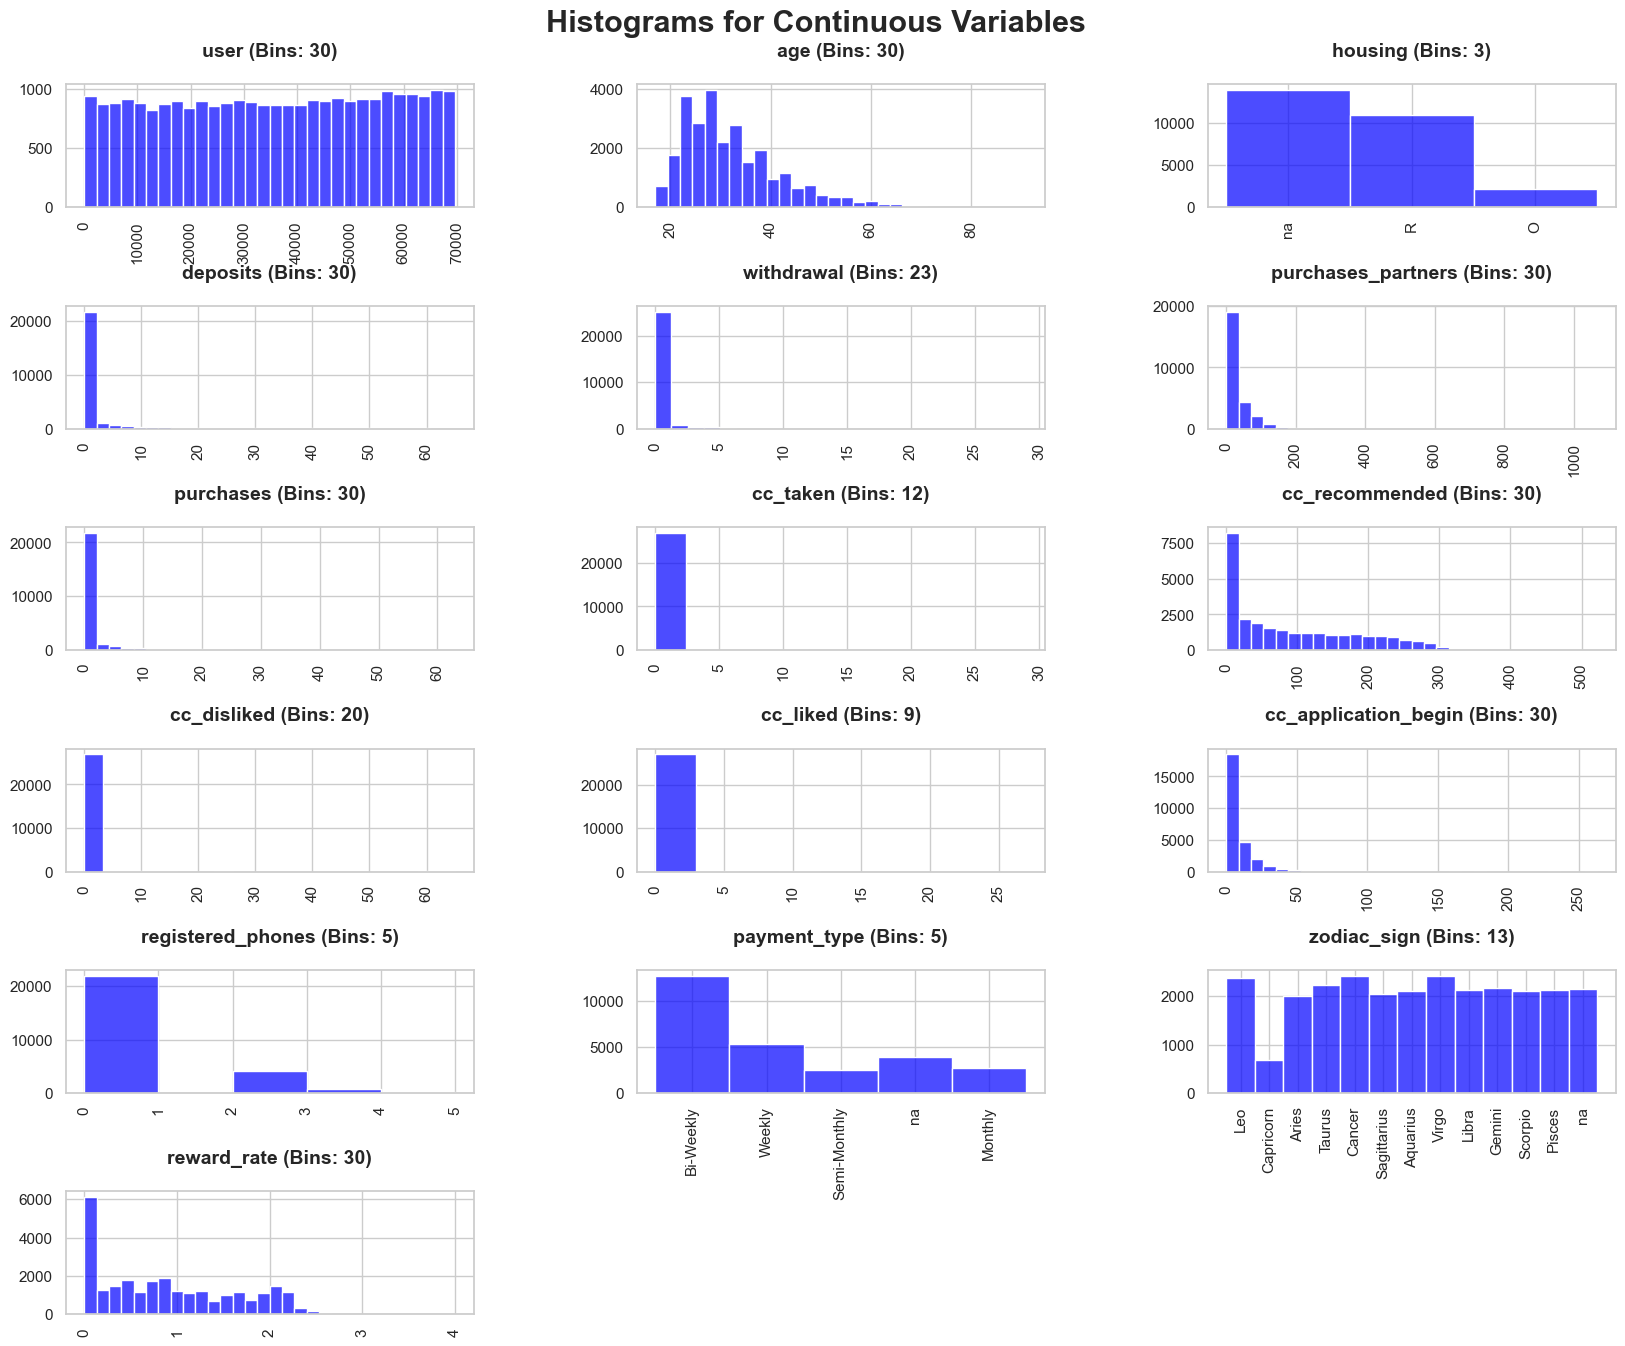

In [17]:
# Set Seaborn styling for better aesthetics
sns.set(style="whitegrid")

# Number of continuous variables and columns per row
num_plots = len(continuous_cols)
cols_per_row = 3  # You can adjust this based on how many subplots you want per row

# Determine the number of rows required based on the number of continuous variables
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0)

# Create subplots with a larger figure size for better readability
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(20, 15))  
plt.suptitle('Histograms for Continuous Variables', fontsize=22, fontweight='bold')

axes = axes.ravel()  # Flatten the 2D axes array to 1D for easy iteration

for i, col in enumerate(continuous_cols):
    # Dynamically set the number of bins based on unique values or data range
    unique_vals = churn_df[col].nunique()
    bins = min(unique_vals, 30)  # Set a maximum of 30 bins
    
    # Plot the histogram using Seaborn
    sns.histplot(churn_df[col], bins=bins, color='blue', alpha=0.7, ax=axes[i])
    
    # Set title and adjust padding to prevent overlap
    axes[i].set_title(f'{col} (Bins: {bins})', fontsize=14, fontweight='bold', pad=20)
    
    # Rotate X-axis tick labels for better readability and set them to 90 degrees
    axes[i].tick_params(axis='x', rotation=90)  # Rotate tick labels by 90 degrees for readability
    
    # Remove x-axis labels for a cleaner look
    axes[i].set_xlabel('')
    
    # Remove y-axis labels (Frequency)
    axes[i].set_ylabel('')

# Remove extra subplots if the number of continuous variables is less than the grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap, significantly increase vertical and horizontal spacing
plt.subplots_adjust(hspace=0.8, wspace=0.4, top=0.93)

# Display the plot
plt.show()


### 1. **User (Bins: 30)**:

- The user column appears to have a uniform distribution with 30 bins. Each bin represents roughly the same count of users, suggesting that the data may be evenly distributed.

### 2. **Deposits (Bins: 30)**:

- The majority of deposits are concentrated around the lower values (close to 0). A large number of users (over 20,000) have made fewer than 10 deposits. As the number of deposits increases, the frequency drops sharply, meaning very few users have made more than 10 deposits.
This distribution is highly right-skewed, meaning a small proportion of users make a large number of deposits, while most users make only a few.

### 3. **Age (Bins: 30)**:

- The age histogram is right-skewed, indicating that most users are younger, with the highest concentration around ages 20 to 40. There are fewer older users in the dataset, as the frequency drops off after age 40.

### 4. **Withdrawals (Bins: 23)**:

- Withdrawals show a highly right-skewed distribution. Most users make fewer withdrawals, with very few users making a large number of withdrawals.

### 5. **Housing (Bins: 3)**:

- The housing data has three categories, likely representing different housing statuses (e.g., R for Rent, O for Own, and `na`). Most users fall under the `na` or rent categories, with fewer people owning homes.

### 6. **Purchases_Partners (Bins: 30)**:

- This histogram shows that most users have a small number of purchases with partners. The distribution is highly right-skewed, indicating a small number of users with a large number of purchases.

### 7. **Purchases (Bins: 30)**:

- The purchases histogram is heavily skewed to the left, with most users having a very low number of purchases (fewer than 10).

### 8. **CC_Taken (Bins: 12)**:

- The histogram shows a highly right-skewed distribution. Most users have taken very few credit cards (fewer than 5), with very few users having taken more than 10.

### 9. **CC_Disliked (Bins: 20)**:

- This histogram shows that most users dislike very few credit cards, with almost all values concentrated at the lower end (near zero).

### 10. **CC_Liked (Bins: 9)**:

- Similar to the `CC_Disliked` variable, the `CC_Liked` histogram shows that most users have liked very few credit cards, with the majority of values near zero.

### 11. **CC_Recommended (Bins: 30)**:

- The `CC_Recommended` variable is right-skewed, showing that most users have recommended very few credit cards, with a small number recommending more than 100 cards.

### 12. **CC_Application_Begin (Bins: 30)**:

- This histogram is highly right-skewed, with most users starting very few credit card applications, and a small number of users starting a large number of applications.

### 13. **Registered_Phones (Bins: 5)**:

- The `Registered_Phones` histogram shows that most users have only registered one phone, while a few users have registered multiple phones (up to 5).

### 14. **Reward_Rate (Bins: 30)**:

- The reward rate is right-skewed, with most users having a low reward rate, but some having a higher rate, as seen from the longer tail.

### 15. **Payment_Type (Bins: 5)**:

- The `Payment_Type` column seems to have five categories. The most common payment frequency is Bi-Weekly, followed by Weekly and Semi-Monthly. Monthly payments and `na` (not applicable or unknown) are less frequent.

### 16. **Zodiac_Sign (Bins: 13)**:

- The zodiac sign distribution appears to be fairly uniform, with the 13 different signs being evenly distributed. This suggests that users are distributed across all zodiac signs without any notable bias toward any particular sign.

---

### General Observations:

- **Skewness**: Many of the variables show strong right skewness, meaning that a large proportion of users fall into lower value ranges (e.g., fewer purchases, fewer credit card applications, etc.).
- **Categorical Data**: For categorical data like `zodiac_sign`, `housing`, and `payment_type`, the distribution is either uniform or concentrated in a few categories (e.g., most users pay bi-weekly or rent).
- **User Behavior**: The histograms reveal that most users engage in minimal transactions across most metrics, whether it be purchases, credit card applications, or other activities.

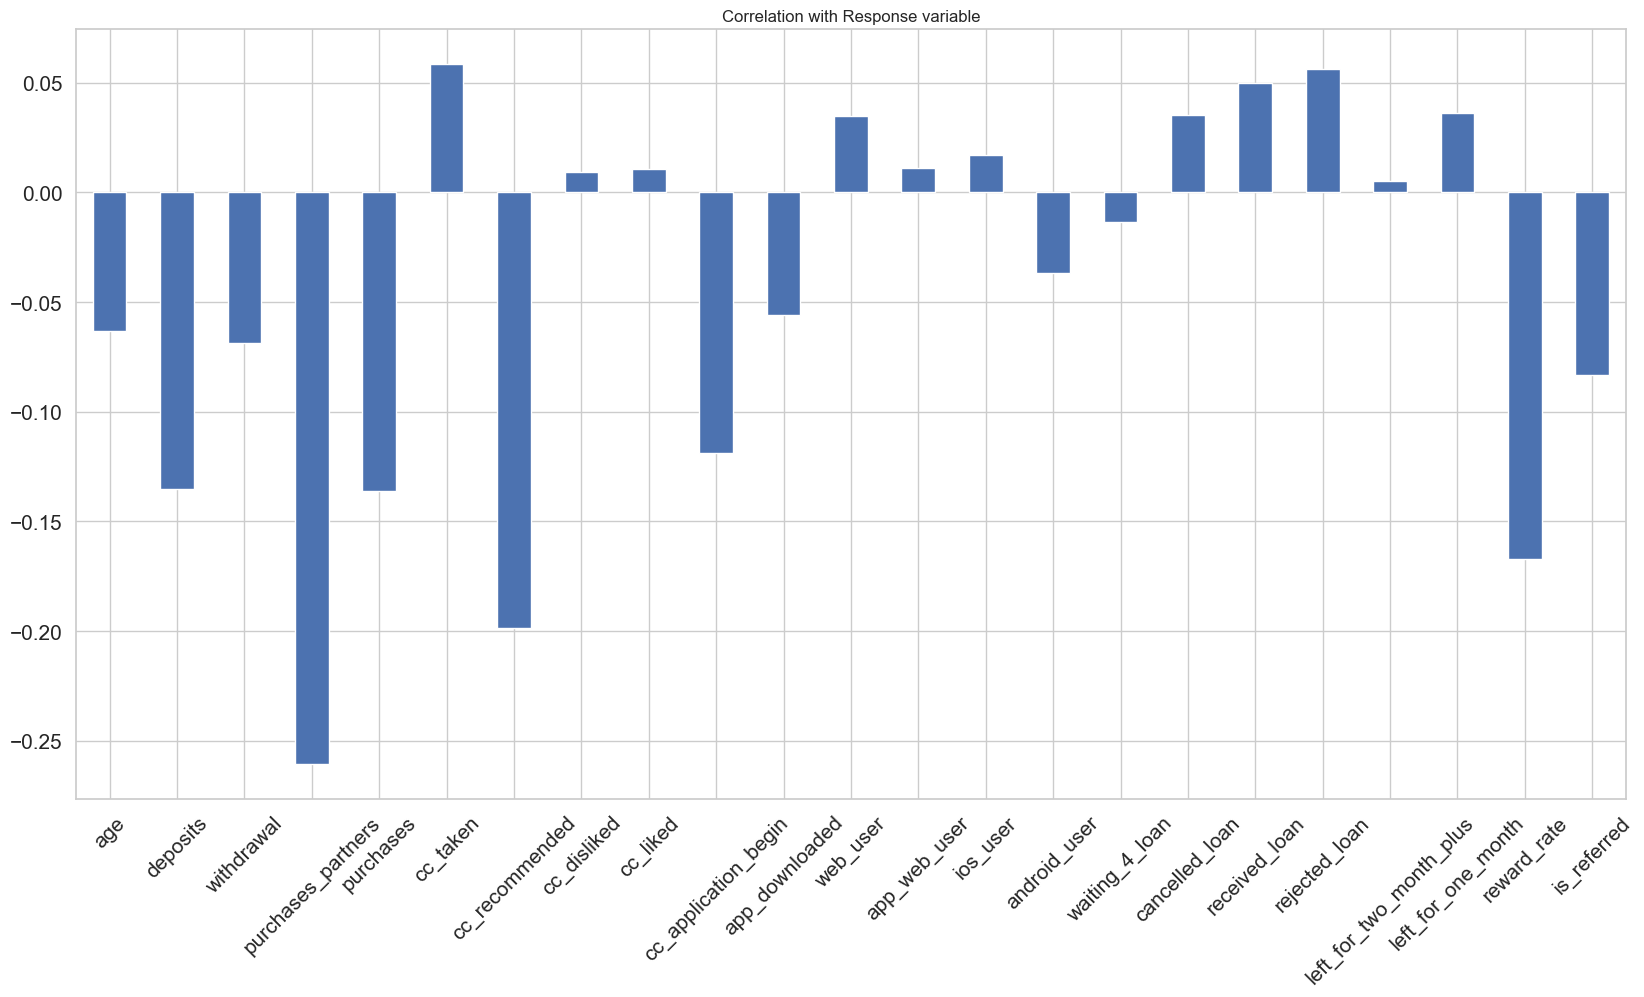

In [19]:
churn_df2.drop(columns = ['housing', 'payment_type','registered_phones', 'zodiac_sign']).corrwith(churn_df.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',fontsize = 15, rot = 45, grid = True)
plt.show()

The plot shows the correlation of various features with a response variable. 

### Observations:

- **X-axis (Features)**: The labels on the X-axis represent different variables (such as "age", "deposits", "purchases", etc.) that have been correlated with the response variable.
  
- **Y-axis (Correlation Values)**: The Y-axis represents the correlation coefficient values, ranging from -0.25 to +0.1. Correlation values can range from -1 to 1:
  - A positive value indicates a **positive correlation** with the response variable, meaning as the feature increases, the response variable also tends to increase.
  - A negative value indicates a **negative correlation**, meaning as the feature increases, the response variable tends to decrease.
  - Values closer to zero indicate a weaker correlation, while values further from zero (either negative or positive) indicate a stronger relationship.


1. **Features with Negative Correlation**:
   - **Withdrawals** and **purchases_partners** show the most negative correlation (close to -0.2), meaning they have a strong inverse relationship with the response variable.
   - **Age**, **purchases**, and **cc_taken** also exhibit negative correlations, though less pronounced.
   - Features like **reward_rate** and **is_referred** also have notable negative correlations.

2. **Features with Positive Correlation**:
   - **cc_recommended** has the highest positive correlation (~0.06), meaning that recommending a credit card has a slight positive relationship with the response variable.
   - Other features with a positive but small correlation include **cc_application_begin**, **app_downloaded**, **web_user**, and **android_user**.

3. **Near-Zero Correlation**:
   - Some features like **cc_liked**, **cc_disliked**, and **ios_user** show correlations very close to zero, implying almost no linear relationship with the response variable.

### Conclusion:
- **Withdrawals** and **purchases with partners** are negatively associated with the response variable, while variables like **cc_recommended** and **app_downloaded** show small positive correlations.
- The strength of correlations varies, but overall the relationships between most features and the response variable appear to be weak (values close to 0), with only a few features standing out in either direction.

This plot provides a quick overview of how each feature influences the response variable, useful for feature selection in modeling or understanding key drivers of the outcome.

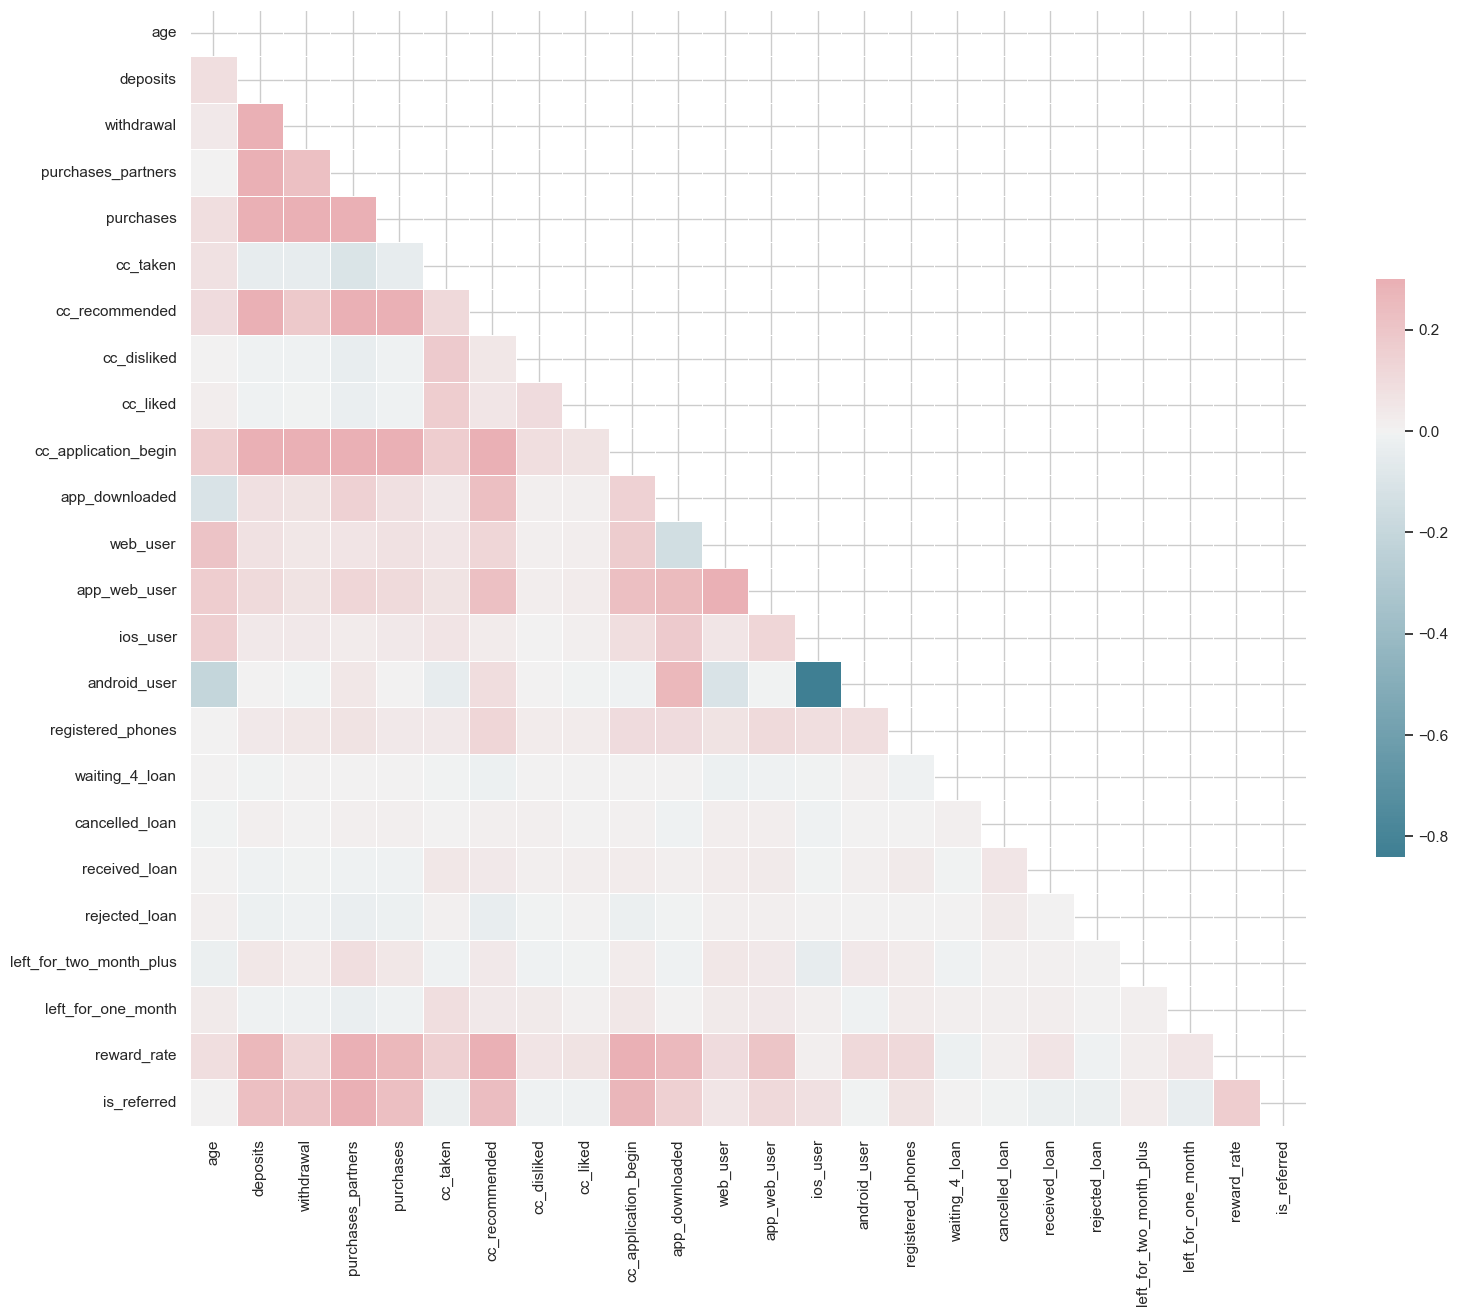

In [21]:

# Replace 'na' strings with NaN
churn_df.replace('na', np.nan, inplace=True)

# Select only numeric columns for correlation
numeric_df = churn_df.drop(columns=['user', 'churn']).select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Display the plot
plt.show()


This correlation matrix includes the relationship between different features related to user behavior and financial transactions. The diagonal is filled with 1.0 values, as expected, because a variable is perfectly correlated with itself.

Key observations:

- The correlation between variables such as **deposits**, **withdrawal**, **purchases**, and **purchases_partners** is slightly positive, suggesting users who engage in one financial activity tend to engage in others.
- There are weak or no correlations between features like **app_downloaded**, **web_user**, **app_web_user**, and the other financial variables, indicating these digital interaction behaviors do not strongly predict financial behaviors.
- The strong negative correlations (dark blue) between features like **android_user** and other user activity suggest a potential division between Android and iOS users in terms of how they interact with the platform.
- There's a very slight correlation between **left_for_two_month_plus** and features such as **purchases**, **withdrawal**, and **deposits**, suggesting users who have left the platform for a longer period may have some relationship with how often they engaged in financial activities before leaving.
- **Reward_rate** and **is_referred** show minimal correlation with most of the variables, indicating these features do not strongly influence other behavioral metrics.
- Features like **left_for_one_month** and **left_for_two_month_plus** have almost no significant correlation with other variables in the matrix, suggesting that user churn is not directly influenced by digital or transactional behaviors in a straightforward way.

Summary:

1. **Behavioral & Transactional Variables** (like **purchases**, **withdrawal**, **app_downloaded**, etc.) have a weak internal correlation but minimal connection to churn-related outcomes, such as **left_for_two_month_plus**. This suggests that although users may engage in certain activities together, these activities may not be strong indicators of whether a user will leave.
2. **Digital Engagement** (e.g., **web_user**, **app_web_user**, **ios_user**, **android_user**) has very low correlations with churn-related features, indicating that whether a user interacts via an app or web might not directly influence their likelihood to leave.
3. **Churn Behavior** (like **left_for_one_month**, **left_for_two_month_plus**) appears disconnected from most other behaviors. This means that predicting churn might require focusing on different metrics, potentially non-transactional ones (such as user satisfaction or customer support interactions) that are not reflected in these matrices.

While there are some positive relationships between transactional behaviors, predicting churn may require incorporating additional variables beyond transactional and basic engagement metrics.

In [23]:
churn_df.replace(np.nan, 'na', inplace=True)

dataset = churn_df.drop(columns = ['app_web_user'])

In [24]:
dataset.to_csv('new_churn_data.csv', index = False)

In [25]:
dataset = pd.read_csv('new_churn_data.csv')
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [26]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [27]:
# One-Hot Encoding
dataset.housing.value_counts()

housing
na    13856
R     10969
O      2171
Name: count, dtype: int64

In [28]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [29]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [30]:
churn_df.replace(np.nan, 'na', inplace=True)

In [31]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [33]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [35]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.6169


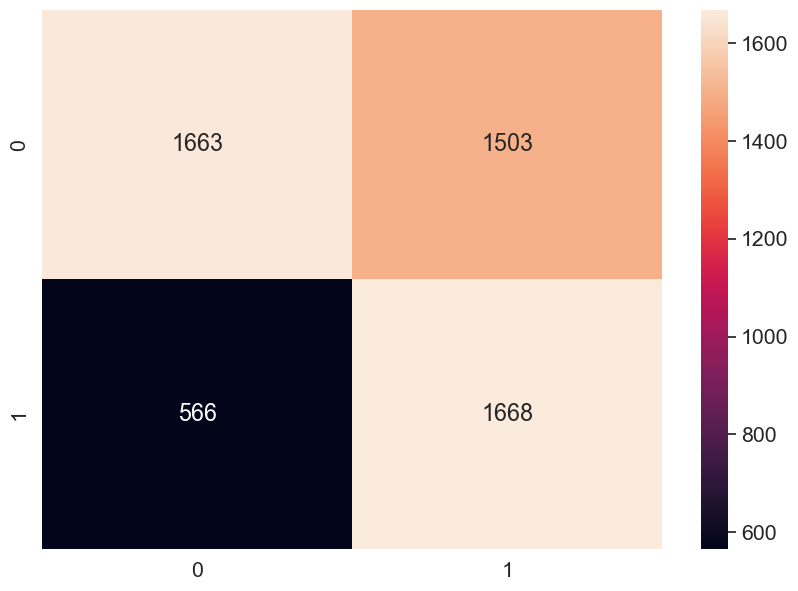

In [37]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- **Confusion Matrix** (`cm`): This shows the performance of the classification model by showing the counts of true positives, false                                      positives, true negatives, and false negatives.
- **Accuracy Score**: This calculates the proportion of correct predictions (`accuracy = (TP + TN) / (TP + TN + FP + FN)`).
- **Precision Score**: Precision measures how many of the predicted positive cases were actually positive (`precision = TP / (TP + FP)`).
- **Recall Score**: Recall measures how many of the actual positive cases were predicted correctly (`recall = TP / (TP + FN)`).
- **F1 Score**: This is the harmonic mean of precision and recall, used to balance both metrics.

In [38]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.649 (+/- 0.012)


The average accuracy across the 10 folds is 64.9%, with a variability of ±1.2%.

In [39]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.188399
1,deposits,0.312231
2,withdrawal,0.063700
3,purchases_partners,-0.783755
4,purchases,-0.451399
5,cc_taken,0.084912
6,cc_recommended,0.096716
7,cc_disliked,-0.024095
8,cc_liked,0.009209
9,cc_application_begin,0.045407


This step is used to analyze the coefficients (weights) learned by the Logistic Regression model. The output lists the features and their corresponding coefficients. Features with large positive or negative coefficients are more influential in the model’s predictions.

In [40]:
## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
# Model to Test
classifier = LogisticRegression()

In [42]:
rfe = RFE(estimator=classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [43]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True False False
 False False False False  True False False False False False  True False
  True False False False False]
[ 1  1  1  1  1  1  1 12 19  1 13  1  1 14  1 15  1  1  1  1  1  1 16 10
 21 11 17  7  1 22  4  5  6 18  1 20  1  8  9  2  3]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'payment_type_Weekly', 'zodiac_sign_Leo',
       'zodiac_sign_Pisces'],
      dtype='object')

- **RFE** (Recursive Feature Elimination) is used here for feature selection. It recursively removes the least important features and ranks them. We want to select the 20 most important features. This gives a boolean array showing which features were selected and a ranking of all features based on their importance.

<Axes: >

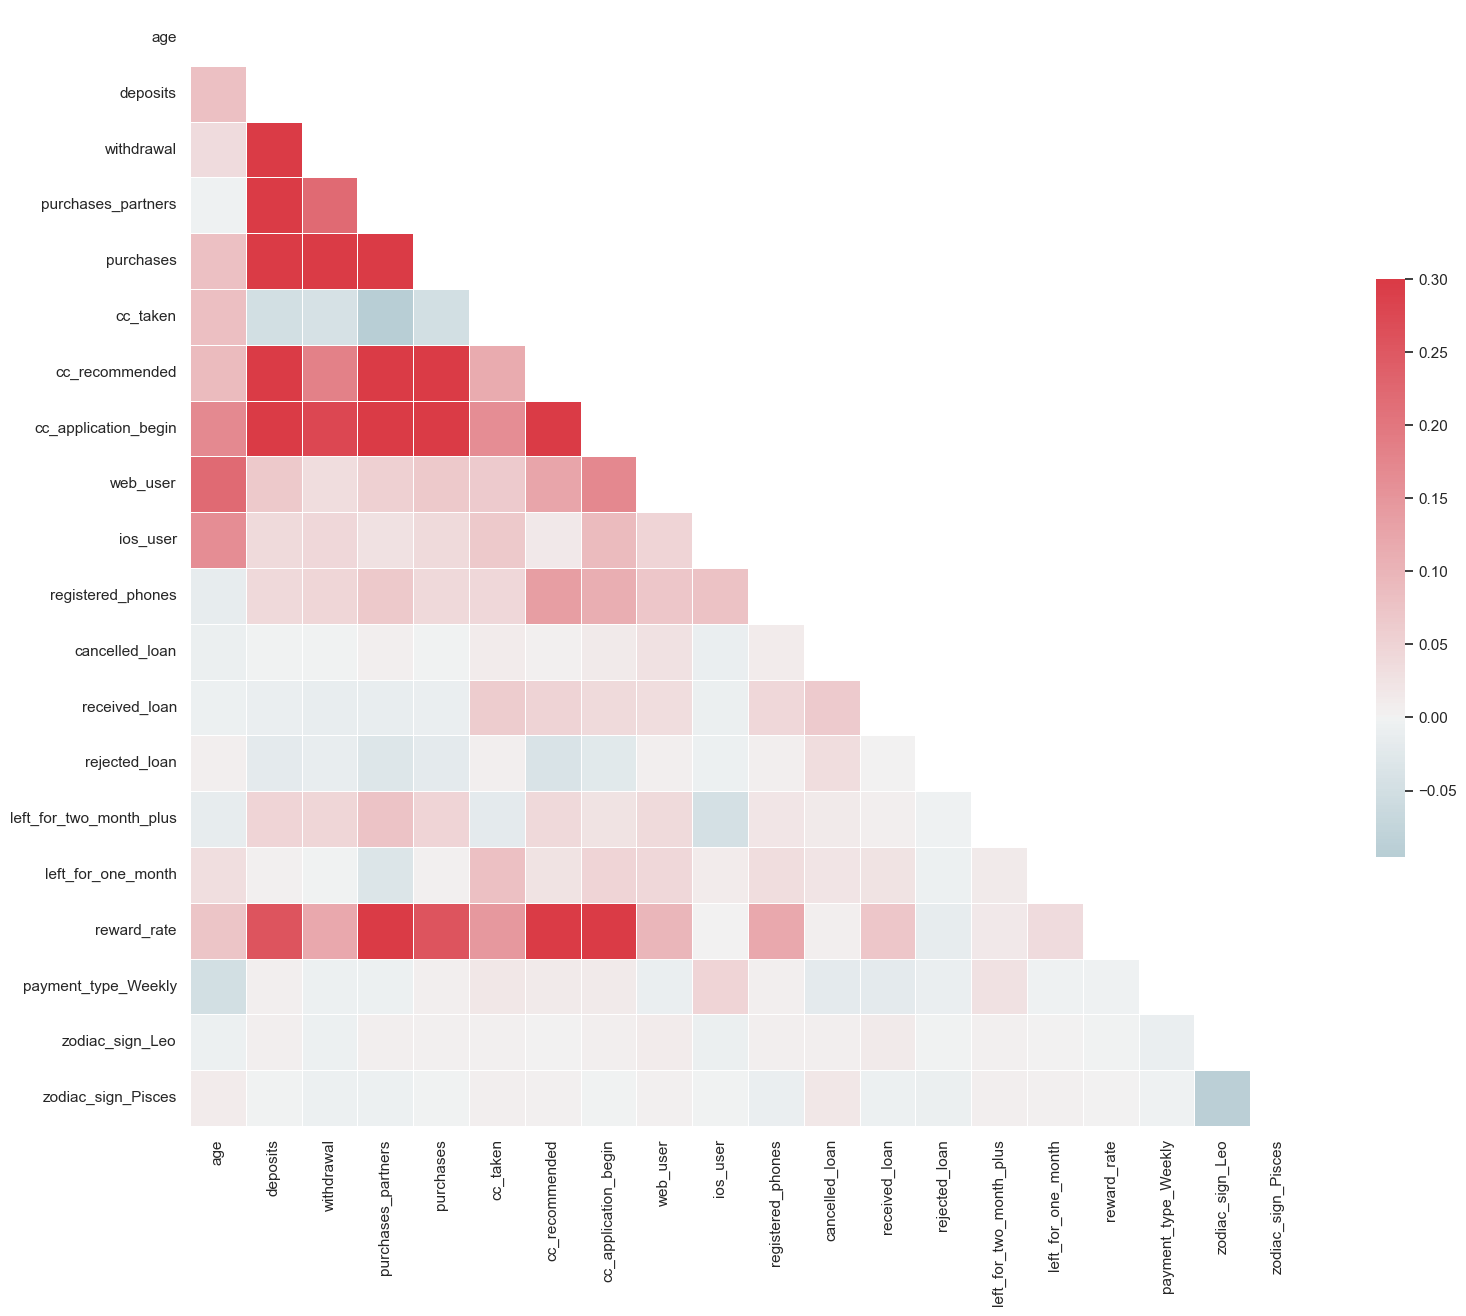

In [44]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This is a heatmap of the correlation matrix for the selected 20 features. The correlation matrix shows how strongly the selected features are correlated with each other.

In [45]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression()

In [46]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [47]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.6124631268436578

Test Data Accuracy: 0.6107


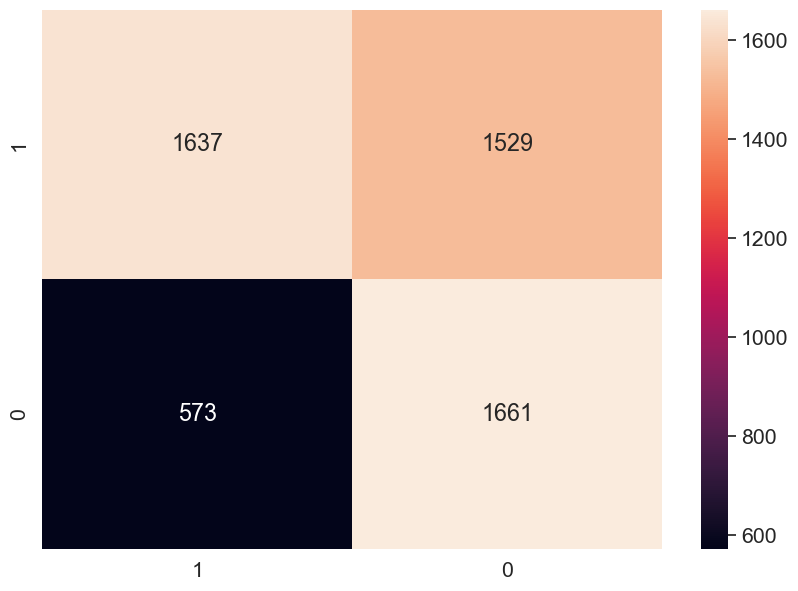

In [48]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [49]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("Logistic Regression Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.647 (+/- 0.011)


In [50]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.187787
1,deposits,0.319609
2,withdrawal,0.065822
3,purchases_partners,-0.775600
4,purchases,-0.459118
5,cc_taken,0.082877
6,cc_recommended,0.101584
7,cc_application_begin,0.043985
8,web_user,0.141900
9,ios_user,0.083129


In [51]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [52]:
print(final_results)

       user  churn  predicted_churn
0     53016    1.0                1
1     54963    0.0                0
2     10511    0.0                0
3     64269    0.0                1
4     30978    0.0                0
...     ...    ...              ...
5395  50513    1.0                0
5396  42775    0.0                1
5397  15284    1.0                1
5398  10432    1.0                0
5399  55716    0.0                1

[5400 rows x 3 columns]


- **Feature Selection with RFE** helped reduce the dimensionality of the data by selecting the 20 most important features.
- **Logistic Regression** was applied to the selected features, and its performance was evaluated using **confusion matrix**, **accuracy**, **precision**, **recall**, and **F1 score**.
- **k-Fold Cross-Validation** provided insights into the model's stability and generalization across different folds of the data.
- The final result (`final_results`) can be used for further analysis.

### Summary:

In this churn prediction project, we used a Logistic Regression model to predict customer churn based on historical data. The following steps were taken:

1. **Model Training**: A Logistic Regression model was trained on a set of selected features using Recursive Feature Elimination (RFE) to retain only the top 20 most important features. This helped in reducing dimensionality while maintaining the most relevant predictors for churn.
2. **Evaluation**: The model was evaluated on the test data using metrics such as accuracy, precision, recall, and F1 score. Additionally, k-Fold Cross-Validation was applied to ensure the model's generalizability across different subsets of the data, providing a robust evaluation of the model’s performance.
3. **Final Results**: The final result DataFrame contains 5,400 rows with three columns: `user` (identifier for each customer), `churn` (actual churn labels), and `predicted_churn` (the model’s predictions). These results allow us to compare the actual churn behavior of customers with the predictions made by the model.
4. **Model Performance**: From the previous code blocks, we have calculated the accuracy of the model (as well as other performance metrics), which allows us to conclude the model’s predictive ability. The accuracy indicates how well the model performed in identifying which customers were likely to churn. The use of precision and recall further helps in understanding the trade-off between false positives and false negatives, which is crucial for business decisions in reducing churn.

### Business Interpretation:

- **Actionable Insights**: The model provides a reliable way to identify customers who are at risk of churn, allowing for targeted marketing campaigns, retention efforts, and resource allocation to high-risk customers. With accurate predictions, the company can focus retention strategies on the customers most likely to leave.
- **Next Steps**: The company can further fine-tune the model, explore additional data sources, or implement strategies based on the churn predictions to minimize customer attrition and enhance customer satisfaction. Furthermore, investigating the features with the highest coefficients can provide deeper insights into the drivers of churn, helping the business address root causes.

In conclusion, the churn model developed in this project offers valuable predictions to help the company mitigate customer churn, which can directly impact profitability and customer lifetime value.